In [2]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [34]:
result_files = {
    "22_04_11/checkpoint-1125": "/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T11-37-32.864302.json",
    "22_04_11/checkpoint-1125 (chat)": "/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125_chat_template/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T12-02-32.381010.json",
    "22_04_11/checkpoint-1125/fewshot (chat)": "/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125_chat_template/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T12-35-29.025822.json",
}

In [35]:
# results_json = json.load(open(result_files["22_04_11/checkpoint-1125"], "r"))
# results_json['results'].keys()

In [ ]:
def plot_each_model_result(result_file, ax, labels=None, sorted_benchmarks=None, legend=None, k=0, benchmark_group=None, metric=None):
    patterns = [ "", "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    results_json = json.load(open(result_file, "r"))
    results = {}
    benchmarks_num = 0

    benchmarks = results_json["results"].keys()
    for benchmark in benchmarks:
        if  benchmark not in ["all"]:
            if benchmark_group is None or (benchmark_group is not None and benchmark_group in benchmark): 
                results[benchmark] = results_json["results"][benchmark]
                benchmarks_num += 1

    # assert benchmarks_num == len(results), f"Expected {benchmarks_num} benchmarks, but got {len(results)}"

    print(results)

    if sorted_benchmarks is None:
        # results = dict(sorted(results.items(), key=lambda item: item[1][metric], reverse=False))
        sorted_benchmarks = list(results.keys())


    if labels is None:
        try:
            labels = []
            # pattern = r"wmt20:(.+?)\|(\d+)"
            pattern = ""
            for key in sorted_benchmarks:
                match = re.search(pattern, key)
                if match:
                    lang_pair = match.group(1)
                    lang_pair = lang_pair.replace("_", "")
                    labels.append(f"{lang_pair} (#{match.group(2)})")
                else:
                    print("XXX",key)
        except:
            labels = sorted_benchmarks

    current_results, current_labels, current_errors = [], [], []
    current_results_indices = []
    for index, benchmark in enumerate(sorted_benchmarks):
        if benchmark in results:
            current_results.append(results[benchmark][metric])
            current_labels.append(labels[sorted_benchmarks.index(benchmark)])
            current_errors.append(results[benchmark][f"{metric}_stderr"])
            current_results_indices.append(index)
        else:
            print(f"Warning: {benchmark} not found in results")
            current_results.append(-1)
            current_labels.append(labels[sorted_benchmarks.index(benchmark)])
            current_errors.append(0)
            current_results_indices.append(index)
    if legend is not None:
        ax.barh(current_labels, current_results, label=legend, alpha=0.5, hatch=patterns[k])
    else:
        ax.barh(current_labels, current_results, alpha=0.5, hatch=patterns[k])

    # plot the std deviation as error bars
    ax.errorbar(
        current_results,
        current_results_indices,
        xerr=current_errors,
        fmt='o',
        # label=f"{legend} (stderr)"
    )

    ax.set_xlabel(f'{metric} Score')
    ax.set_title('WMT20 Evaluation Results')
    ax.legend()

    return ax, sorted_benchmarks, labels

{'leaderboard|gsm8k|0': {'qem': 0.177407126611069, 'qem_stderr': 0.010522533016890776}}
{'leaderboard|gsm8k|5': {'qem': 0.19257012888551933, 'qem_stderr': 0.010861483868509934}, 'leaderboard|gsm8k|8': {'qem': 0.18119787717968158, 'qem_stderr': 0.01060982761152735}}


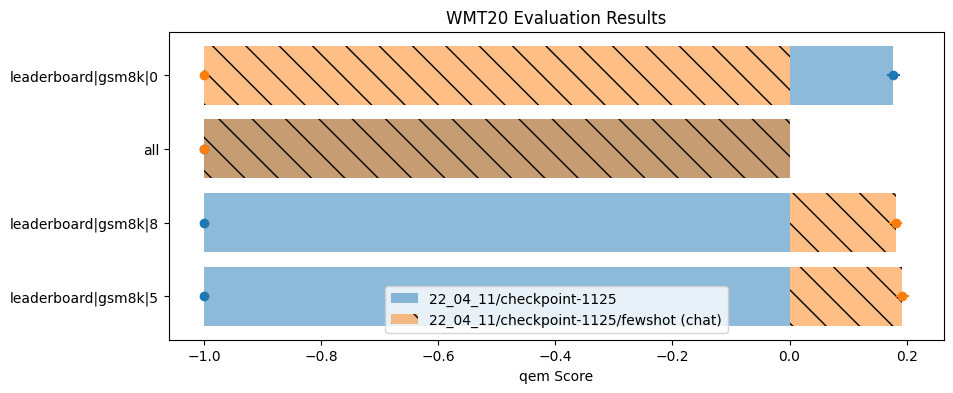

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))

sorted_benchmarks = []
for result_file in result_files.values():
    benchmarks = json.load(open(result_file, "r"))["results"].keys()
    sorted_benchmarks += benchmarks

sorted_benchmarks = list(set(sorted_benchmarks))
    
labels = None
index = 0
for legend, result_file in result_files.items():
    if index != 1:
        ax, sorted_benchmarks, labels = plot_each_model_result(result_file, ax, sorted_benchmarks=sorted_benchmarks, labels=labels, legend=legend, k=index, benchmark_group=None, metric="qem")
    index += 1


/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T11-37-32.864302.json
{'leaderboard|gsm8k|0': {'qem': 0.177407126611069, 'qem_stderr': 0.010522533016890776}}
/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125_chat_template/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T12-02-32.381010.json
{'leaderboard|gsm8k|0': {'qem': 0.177407126611069, 'qem_stderr': 0.010522533016890776}}
/raid/s3/opengptx/behzad_shomali/evaluation_results/gsm8k/teuken3.7B_IT/22_04_11/checkpoint-1125_chat_template/results/Behzadshomali/Teuken3.7B_IT_LoRA/results_2025-08-22T12-35-29.025822.json
{'leaderboard|gsm8k|5': {'qem': 0.19257012888551933, 'qem_stderr': 0.010861483868509934}, 'leaderboard|gsm8k|8': {'qem': 0.18119787717968158, 'qem_stderr': 0.01060982761152735}}


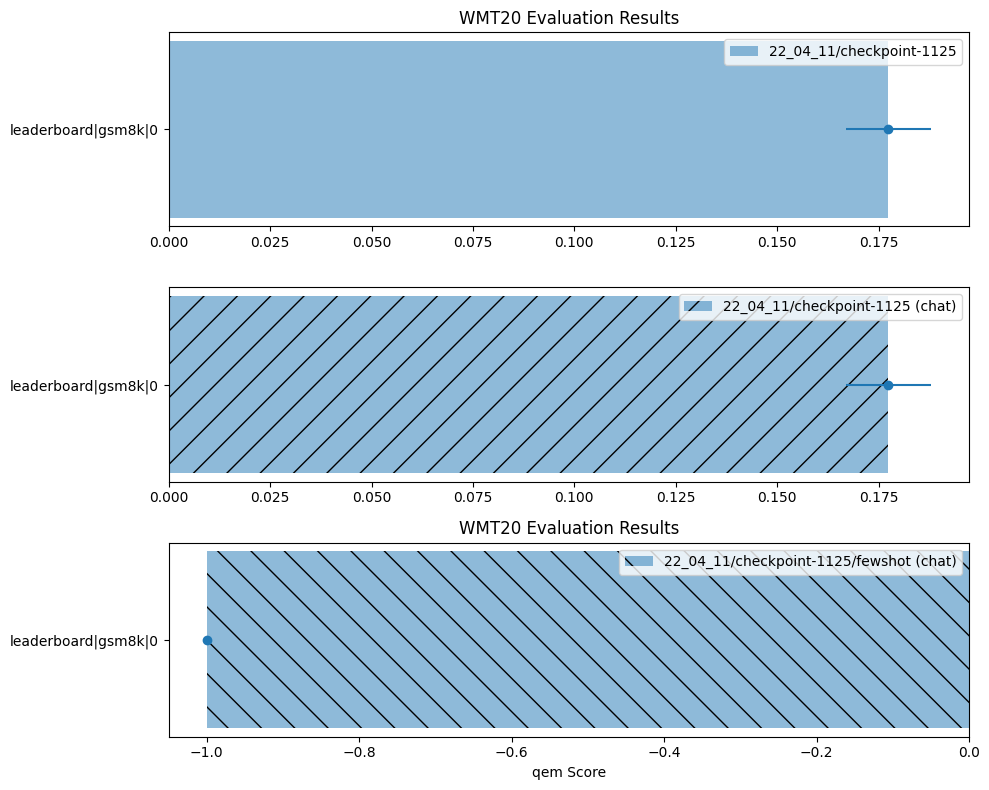

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

sorted_benchmarks = None
labels = None
index = 0
for legend, result_file in result_files.items():
    print(result_file)
    _, sorted_benchmarks, labels = plot_each_model_result(result_file, axs[index], sorted_benchmarks=sorted_benchmarks, labels=labels, legend=legend, k=index, metric='qem')
    index += 1

axs[1].set_title("")
# axs[2].set_title("")

axs[0].set_xlabel("")
axs[1].set_xlabel("")

# axs[0].set_xlim([0, 65])
# axs[1].set_xlim([0, 65])
# axs[2].set_xlim([0, 65])


plt.tight_layout()


In [47]:
with open(list(result_files.values())[0], 'r') as f:
        eval_results = json.load(f)

In [49]:
eval_results['results']

{'leaderboard|gsm8k|0': {'qem': 0.177407126611069,
  'qem_stderr': 0.010522533016890776},
 'all': {'qem': 0.177407126611069, 'qem_stderr': 0.010522533016890776}}